<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_SustitucionValorArbitrario_FeatureEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sustitución por valores arbitrarios  ==> Feature-engine


### Qué es Feature-engine?

Feature-engine es una librería de Python que hemos creado para este curso. 

- Feature-engine incluye todas las técnicas de ingeniería de variables descritas en este curso
- Feature-engine funciona como Scikit-learn, por lo tanto es fácil de aprender
- Feature-engine te permite implementar pasos de ingeniería de variables específicos para diferentes grupos de variables
- Feature-engine puede ser integrado con las pipelines de Scikit-learn pipeline permitiendo construir modelos fácilmente
** Feature-engine te permite diseñar y guardar un flujo de ingeniería de variables con procesos diseñados específicamente para diferentes grupos de variables.**

-------------------------------------------------------------------
Feature-engine puede ser instalado vía pip ==> pip install feature-engine

- Asegurate que haz instalado Feature-engine antes de correr este notebook

Para más detalle visita el [website the trainindata]( https://www.trainindata.com/feature-engine) 


## En este demo:

Vamos a usar **Feature Engine para hacer la sustitución por valores arbitrarios** usando los datos Ames House Price.


### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahí el nombre dado a la clase.


In [1]:
pip install feature-engine

     |████████████████████████████████| 9.5MB 522kB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#  Feature-engine
from feature_engine import missing_data_imputers as mdi

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# carguemos los datos con unas columnas seleccionadas

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   BsmtQual     1423 non-null   object 
 3   FireplaceQu  770 non-null    object 
 4   GarageYrBlt  1379 non-null   float64
 5   SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 68.6+ KB


In [13]:
data.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
BsmtQual       0.025342
MasVnrArea     0.005479
SalePrice      0.000000
dtype: float64

Todas las variables predictivas tienen datos ausentes

In [14]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables
#Separamos los conjuntos porque la función solo debe de aprender del set de entrenamiento
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

## Feature-engine captura las variables numéricas automáticamente

In [15]:
# llamemos el imputer de Feature-engine
# especifiquemos el valor arbitrario a utilizar como un argumento

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999)

In [16]:
# ajustemos el imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999, imputer_dict=None,
                       variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [17]:
# vemos que el imputer encontró las variables numéricas para sustituir con el valor arbitrario

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
# aquí podemos ver el valor arbitrario guardado
imputer.arbitrary_number

-999

In [19]:
# Feature-engine retorna un dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bfa77ef28>,
      dtype=object)

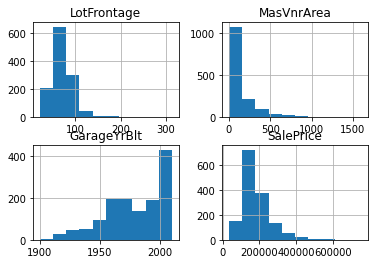

In [21]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bfa7b8fd0>,
      dtype=object)

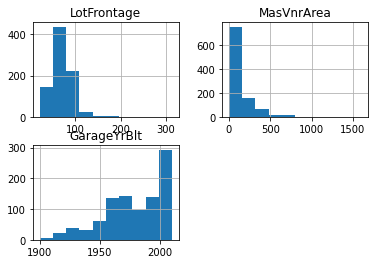

In [23]:
#La distribuición cambio después de la imputación
X_train.hist()

In [24]:
# revisemos que las variables ya no tienen NA

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine te permite especificar grupos de variables fácilmente


In [25]:
# usemos la sustitución pero esta vez  
# imputemos 2 de la 3 variables numéricas

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                     variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999, imputer_dict=None,
                       variables=['LotFrontage', 'MasVnrArea'])

In [26]:
# ahora el imputer solo transforma las variable que le indicamos

imputer.variables

['LotFrontage', 'MasVnrArea']

In [27]:
# y podemos ver el valor asignado para cada variable

imputer.arbitrary_number

-999

In [28]:
# Feature-engine devuelve un dataframe

tmp = imputer.transform(X_train)

# revisemos que las variables ya no tienen NA

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-engine puede ser usado con los flujos de Scikit-learn (pipeline)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bfa5f17f0>,
      dtype=object)

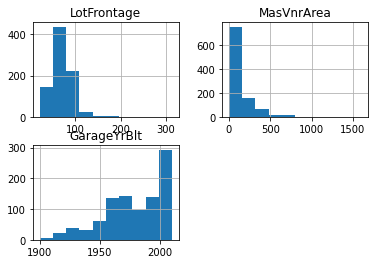

In [29]:
# miremos las distribuciones y determinemos el valor arbitrario a usar

X_train.hist()

In [30]:
pipe = Pipeline([
    ('imputer_999', mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                             variables = ['LotFrontage', 'MasVnrArea'])),
     
    ('imputer_minus1', mdi.ArbitraryNumberImputer(arbitrary_number = -1,
                                          variables = ['GarageYrBlt'])),
     ])

In [31]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_999',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        imputer_dict=None,
                                        variables=['LotFrontage',
                                                   'MasVnrArea'])),
                ('imputer_minus1',
                 ArbitraryNumberImputer(arbitrary_number=-1, imputer_dict=None,
                                        variables=['GarageYrBlt']))],
         verbose=False)

In [32]:
pipe.named_steps['imputer_999'].arbitrary_number

-999

In [33]:
pipe.named_steps['imputer_minus1'].arbitrary_number

-1

In [34]:
# transformemos los datos con la pipeline
tmp = pipe.transform(X_train)

# revisemos que ya no tenemos valores nulos
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

Ya no tenemos valores nulos para ninguna de las 3 variables numéricas que sustituimos